In [1]:
import utils
import math
import re
import itertools
from typing import NamedTuple
from collections import defaultdict, deque
import itertools
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt

## Day 11: Seating System

[#](https://adventofcode.com/2020/day/11). We have a seating grid with `.` being floor, `L` an empty seat and `#` an occupied seat.

In [2]:
test11 = """L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL""".splitlines()

inp11 = utils.get_input(11, splitlines=True)

def parse_11(inp=test11):
    return [[c for c in row] for row in inp]

grid = parse_11()
grid

[['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', '.', 'L', '.', '.', 'L', '.', '.'],
 ['L', 'L', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['.', '.', 'L', '.', 'L', '.', '.', '.', '.', '.'],
 ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L']]

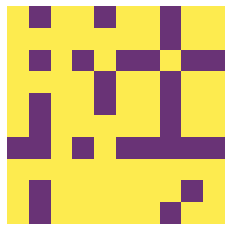

In [4]:
def plot_grid(grid):
    colors = {"#": 0, ".": 100, "L": 200 }
    new_grid = []
    for y, row in enumerate(grid):
        new_row = []
        for x, char in enumerate(row):
            new_row.append(colors[char])
        new_grid.append(new_row)
    
    plt.imshow(new_grid, alpha=0.8)
    plt.axis('off')
    plt.show()

plot_grid(grid)

In [5]:
def get_char(grid, x, y):
    """returns character on grid at given x,y"""
    if min(x,y) >= 0 and y < len(grid) and x < len(grid[0]):
        return grid[y][x]
    else:
        return False
    
get_char(grid, 0, -1), get_char(grid, 0, 0), get_char(grid, 0, 10)

(False, 'L', False)

In [6]:
def adjacent_seats(grid, x, y):
    check = [(x-1, y+1), (x, y+1), (x+1, y+1),
             (x-1, y), (x+1, y),
             (x-1, y-1), (x, y-1), (x+1, y-1)]
    
    adjacent = 0
    
    for x, y in check:
        char = get_char(grid, x, y)
        if char and grid[y][x] == "#":
            adjacent += 1
        
    return adjacent

adjacent_seats(grid, 1, 1)

0

In [7]:
def count_seats(grid, seat="#"):
    return sum([row.count(seat) for row in grid])

count_seats(grid)

0

In [8]:
def print_grid(grid=grid):
    _ = [print("".join(row)) for row in grid]
    
print_grid()

L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL


In [10]:
%time
def solve_11(inp=test11) -> int:
    """applies rules until num of new seats don't change, return num of seats occupied"""
    grid = parse_11(inp)
    
    seats = -1 # dummy num
    new_seats = count_seats(grid)
    
    while seats != new_seats:
        new_grid = deepcopy(grid)
        
        for y, row in enumerate(grid):
            for x, char in enumerate(row):
                if char == "L" and adjacent_seats(grid, x, y) == 0:
                    new_grid[y][x] = "#"
                elif char == "#" and adjacent_seats(grid, x, y) >= 4:
                    new_grid[y][x] = "L"
                else:
                    pass
                    #print((x,y), char, adjacent_seats(grid, x, y), get_char(grid, x, y))
        
        
        grid = deepcopy(new_grid)
        
        seats = new_seats 
        new_seats = count_seats(grid)
        
    return count_seats(grid)
    
assert solve_11() == 37
solve_11(inp11)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 12.4 µs


2299

phew! that took some doing. the ans to my input is `2299`.

## Part 2

Instead of counting the adjacent seats, ppl just care about the first seat they can see in each direction.

So look at the first seat visible in each of the eight directions (up, down, left, right, 4xdiagonal).

The above code is pretty messy, so turning it into a class:

In [71]:
class Seats:
    def __init__(self, inp):
        self.grid = parse_11(inp)
        self.directions = [(-1, +1), (0, +1), (+1, +1),
                           (-1,  0),          (+1,  0),
                           (-1, -1), (0, -1), (+1, -1)]

    def get_char(self, x:int, y:int) ->str:
        """returns character on grid at given x,y"""
        if min(x,y) >= 0 and y < len(self.grid) and x < len(self.grid[0]):
            return self.grid[y][x]
        else:
            return False

    def count_seats(self, seat="#") -> int:
        return sum([row.count(seat) for row in self.grid])

    def look_at_first_chair(self, X:int, Y:int) -> int:
        """looks at the first seat in each of the 8 directions"""
        seat_count = 0

        for dx, dy in self.directions:
            x, y = X, Y # copy
            
            char = self.get_char(x, y) # starting location
            while char: # keep going until exits board
                x += dx
                y += dy
                char = self.get_char(x, y)

                if char == "L":
                    break
                elif char == "#":
                    seat_count += 1
                    break
            
        return seat_count

    def step(self):
        """evolve seating layout one step"""
        new_grid = deepcopy(self.grid)
        
        for y, row in enumerate(self.grid):
            for x, char in enumerate(row):
                if char == "L" and self.look_at_first_chair(x, y) == 0:
                    new_grid[y][x] = "#"
                elif char == "#" and self.look_at_first_chair(x, y) >= 4:
                    new_grid[y][x] = "L"
                else:
                    pass
                    #print((x,y), char, adjacent_seats(grid, x, y), get_char(grid, x, y))
        
        
        self.grid = deepcopy(new_grid)


seats = Seats(inp=test11)
seats.look_at_first_chair(0, 0)

0

In [70]:
seats.step()
seats.grid

[['#', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', '#'],
 ['L', 'L', '#', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['#', '.', 'L', '.', 'L', '.', '.', 'L', '.', '.'],
 ['L', 'L', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['#', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['.', '.', 'L', '.', 'L', '.', '.', '.', '.', '.'],
 ['#', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', '#'],
 ['L', '.', '#', 'L', 'L', 'L', 'L', '#', '.', 'L'],
 ['#', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', '#']]

In [19]:
directions = [(-1, +1), (0, +1), (+1, +1),
              (-1,  0),          (+1,  0),
              (-1, -1), (0, -1), (+1, -1)]

for dx, dy in directions:
    print(dx, dy)

-1 1
0 1
1 1
-1 0
1 0
-1 -1
0 -1
1 -1


In [29]:
x, y = (3,3)

dx, dy = directions[0]
dx, dy, x, y

get_char(x, y, n)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'int'

In [12]:
n = np.array(grid)
n

array([['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
       ['L', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
       ['L', '.', 'L', '.', 'L', '.', '.', 'L', '.', '.'],
       ['L', 'L', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
       ['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
       ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
       ['.', '.', 'L', '.', 'L', '.', '.', '.', '.', '.'],
       ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'],
       ['L', '.', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L'],
       ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L']], dtype='<U1')

In [13]:
x, y = 2,2
xx = n[y,:] # horizontal
yy = n[:,x] # vertical
xx, yy

(array(['L', '.', 'L', '.', 'L', '.', '.', 'L', '.', '.'], dtype='<U1'),
 array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1'))

In [16]:
diag1 = n.diagonal(offset=2) # topleft to bottom right
diag2 = n.diagonal() # bottom left to top right
diag1, diag2, 

(array(['L', 'L', 'L', 'L', 'L', '.', '.', 'L'], dtype='<U1'),
 array(['L', 'L', 'L', 'L', '.', 'L', '.', 'L', '.', 'L'], dtype='<U1'))

In [4]:
def solve_6b(inp=test6):
    pass
    
#assert solve_6b() == 6
solve_6b()

In [181]:
x, y = 1, 1
x, y
grid

[['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', '.', 'L', '.', '.', 'L', '.', '.'],
 ['L', 'L', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', 'L', '.', 'L', 'L', '.', 'L', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L'],
 ['.', '.', 'L', '.', 'L', '.', '.', '.', '.', '.'],
 ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L'],
 ['L', '.', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L']]

In [182]:
grid[y]

['L', 'L', 'L', 'L', 'L', 'L', 'L', '.', 'L', 'L']

In [ ]:
def visible_seats(grid, x, y):
    """return num of seats visible"""
    check = [(x-1, y+1), (x, y+1), (x+1, y+1),
             (x-1, y), (x+1, y),
             (x-1, y-1), (x, y-1), (x+1, y-1)]